In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\data-export (1).csv")
df.head(10)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
5,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
6,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
7,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
8,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779
9,Organic Social,2024041321,152,178,96,30.48876404494380,0.631578947368421,5.056179775280900,0.5393258426966290,900


In [3]:
df.columns =df.iloc[0]
df= df.drop(index = 0).reset_index(drop= True)
df.columns = ["channel group", "DateHour", "Users", "Sessions", "Engaged Sessions","Average engagment time per session","Engaged sessions per user","Events per session","Engagment rate","Event count"]

In [4]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagment time per session,Engaged sessions per user,Events per session,Engagment rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [5]:
df.shape

(3182, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   channel group                       3182 non-null   object
 1   DateHour                            3182 non-null   object
 2   Users                               3182 non-null   object
 3   Sessions                            3182 non-null   object
 4   Engaged Sessions                    3182 non-null   object
 5   Average engagment time per session  3182 non-null   object
 6   Engaged sessions per user           3182 non-null   object
 7   Events per session                  3182 non-null   object
 8   Engagment rate                      3182 non-null   object
 9   Event count                         3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [8]:
df['DateHour'] = pd.to_datetime(df["DateHour"],format="%Y%m%d%H",errors='coerce')
numeric_cols = df.columns.drop(["channel group","DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"] = df["DateHour"].dt.hour

In [9]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged Sessions,Average engagment time per session,Engaged sessions per user,Events per session,Engagment rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   channel group                       3182 non-null   object        
 1   DateHour                            3182 non-null   datetime64[ns]
 2   Users                               3182 non-null   int64         
 3   Sessions                            3182 non-null   int64         
 4   Engaged Sessions                    3182 non-null   int64         
 5   Average engagment time per session  3182 non-null   float64       
 6   Engaged sessions per user           3182 non-null   float64       
 7   Events per session                  3182 non-null   float64       
 8   Engagment rate                      3182 non-null   float64       
 9   Event count                         3182 non-null   int64         
 10  Hour                    

In [11]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagment time per session,Engaged sessions per user,Events per session,Engagment rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [12]:
df.isnull().sum()

channel group                         0
DateHour                              0
Users                                 0
Sessions                              0
Engaged Sessions                      0
Average engagment time per session    0
Engaged sessions per user             0
Events per session                    0
Engagment rate                        0
Event count                           0
Hour                                  0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
#Sessions and user over time
sns.set(style="whitegrid")

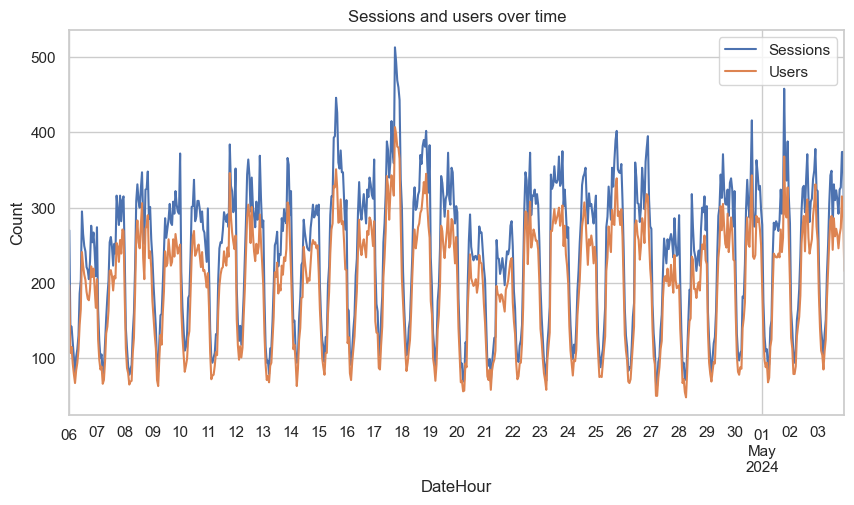

In [18]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

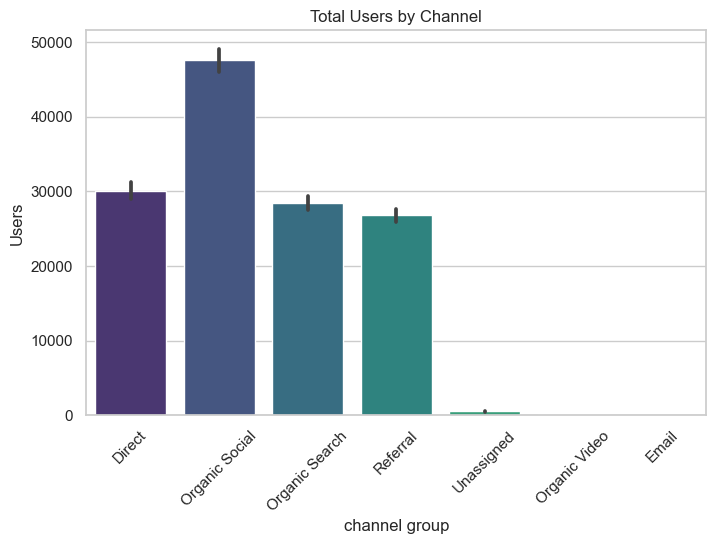

In [21]:
#Total Users by Channels

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group",y="Users",estimator=np.sum, palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

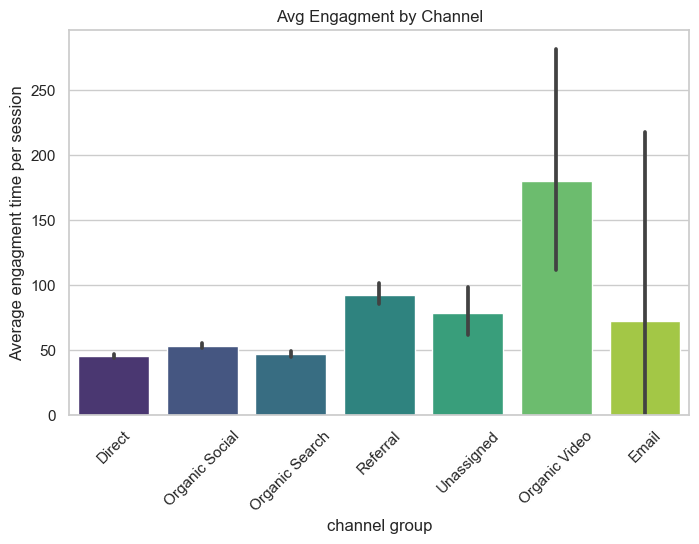

In [24]:
#Average engagment time by channel

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group",y="Average engagment time per session",estimator=np.mean, palette="viridis")
plt.title("Avg Engagment by Channel")
plt.xticks(rotation=45)
plt.show()

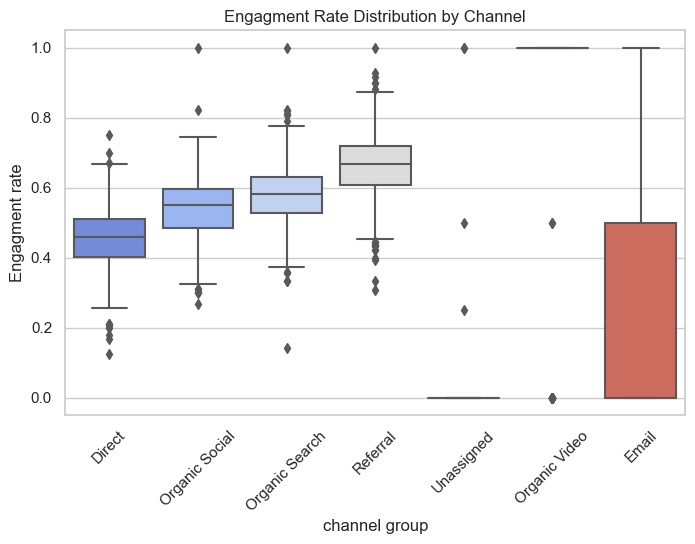

In [28]:
#Engagement Rate Distribution by channel
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="channel group", y="Engagment rate",palette="coolwarm")
plt.title("Engagment Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

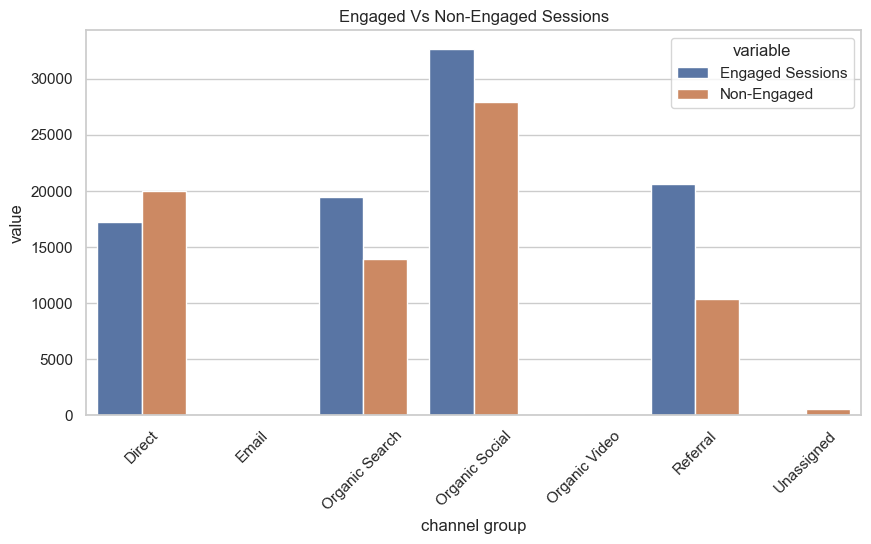

In [30]:
#Engaged Vs Non Engaged Sessions

sessions_df = df.groupby("channel group")[["Sessions", "Engaged Sessions"]].sum().reset_index()
sessions_df["Non-Engaged"] = sessions_df["Sessions"] - sessions_df["Engaged Sessions"]
sessions_df_melted = sessions_df.melt(id_vars="channel group", value_vars=["Engaged Sessions","Non-Engaged"])

plt.figure(figsize=(10,5))
sns.barplot(data=sessions_df_melted, x="channel group",y="value",hue="variable")
plt.title("Engaged Vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

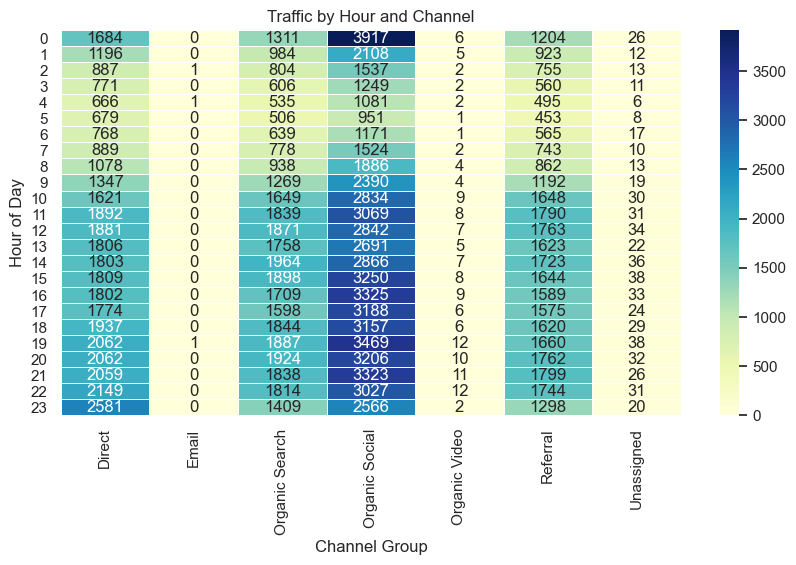

In [32]:
#Traffic by Hour and Channel

heatmap_data = df.groupby(["Hour","channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap="YlGnBu",linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

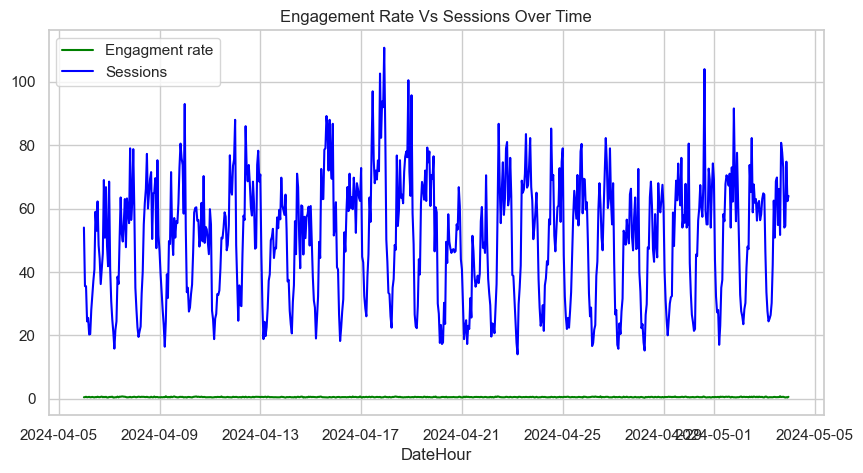

In [37]:
#Engagement Rate Vs sessions over time

df_plot = df.groupby("DateHour")[["Engagment rate","Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagment rate"],label="Engagment rate",color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"],label="Sessions",color="blue")
plt.title("Engagement Rate Vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()